### Getting imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [15]:
def read_list(filename: str) -> list:
    """ Extract the diversity or novelty list from txt file
    
        Example usage:
        >>> read_list('jaccard_diversities_real.txt')
    """
    with open(file=filename, mode='r') as f:
        result_list = list()
        data = f.read().split(',\n')
        for line in data[1:]:
            result_list.append(float(line.replace("]","")))
    return result_list

In [3]:
def normal_distribution(values: list, name_of_values: str) -> None:
    """
    
    Example usage:
    >>> normal_distribution(all_diversities, 'Diversity of generated text')
    """

    
    mean = np.nanmean(values)
    sigma = np.nanstd(values)

    num_bins = 100

    fig, ax = plt.subplots()

    #the histogram of the data
    n, bins, _ = ax.hist(values, num_bins, normed=True)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mean, sigma)
    ax.plot(bins, y, linewidth=2, color='r')
    ax.set_xlabel(name_of_values)
    ax.set_xlim([0.5,1])
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of distribution: $\mu={}$, $\sigma={}$'.format(
        round(mean, 3), round(sigma, 3)))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                          np.exp(- (bins - mean)**2 / (2 * sigma**2)),
    #                    linewidth=2, color='r')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

In [14]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='blue', label='Fake text', alpha=0.3)
    plt.scatter(data_x1, data_y1, color='red', label='Real text', alpha=0.3)

    plt.title('{} vs {} of sentences for generated text set'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

## Retrieve the list of diversity and novelty from the text files

In [10]:
real_diversities = read_list('jaccard_diversities_real.txt')
real_novelties = read_list('jaccard_novelties_real.txt')

fake_diversities = read_list('jaccard_diversities_fake3.txt')
fake_novelties = read_list('jaccard_novelties_fake3.txt')

### Scatter plot of novelties vs diversities

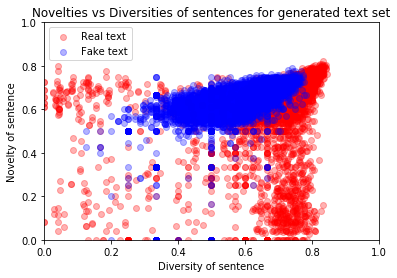

In [11]:
get_scatter_plot(fake_diversities, fake_novelties, real_diversities, real_novelties)

## Real text: Distribution of novelties and diversities

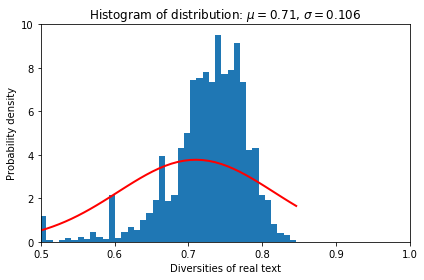

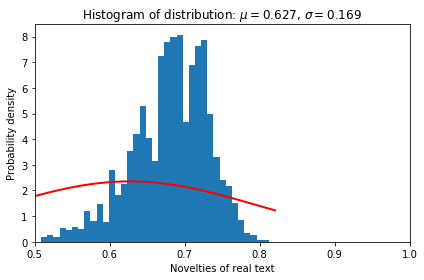

In [12]:
normal_distribution(real_diversities, 'Diversities of real text')
normal_distribution(real_novelties, 'Novelties of real text')

## Fake text: Distribution of novelties and diversities

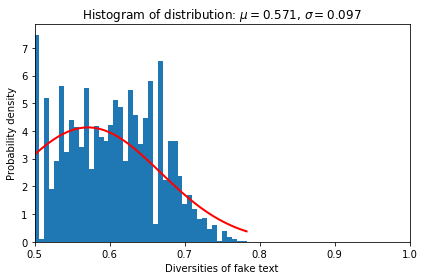

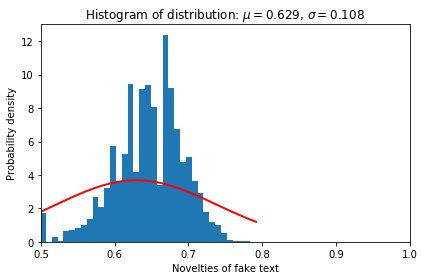

In [13]:
normal_distribution(fake_diversities, 'Diversities of fake text')
normal_distribution(fake_novelties, 'Novelties of fake text')